# Lab 01:  Simple linear regression

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the [demo](./auto_mpg.ipynb) to see an example of these operations on an automobile dataset.  This lab uses the Boston Housing data set, which is a widely-used machine learning data set for illustrating basic concepts.  

## Loading the data

The Boston housing data set was collected in the 1970s to study the relationship between house price and various factors such as house size, crime rate, socio-economic status, etc.  Since these variables are easy to understand, the data set is ideal for learning basic concepts in machine learning.  

We now load the Boston housing dataset, which happens to be pre-loaded into sklearn.

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

Let's see what the dataset contains.

In [2]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


The structure `boston` is made up of
* `data`: which contains the information for various houses
* `target`: which contains their prices
* `feature_names`: which contains the names of the features, and
* `DESCR`: which describes the dataset
* `filename`: which shows where the file is stored on your local machine

Let's print the description.

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Let's turn this dataset into a `pandas` dataframe for ease of handling.

In [4]:
import pandas as pd
df = pd.DataFrame(boston.data) # load numerical data
df.columns = boston.feature_names # set column names
df['MEDV'] = boston.target # define target as median house price

Display the first six rows of the data frame

In [5]:
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [6]:
# TODO
print('num shape=%s' %str(df.shape))
print('num attributes=%d' %len(df.columns))
print('num samples=%d' %df.size)

num shape=(506, 14)
num attributes=14
num samples=7084


Create a response vector `y` with the values in the column `MEDV` using the `numpy.array` command.

In [7]:
import numpy as np
# TODO
# y = ...
y = np.array(df['MEDV'])

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $40k. (You may realize this is very cheap.  Prices have gone up a lot since the 1970s!).   Create print statements of the form:

    The mean house price is xx.yy thousands of dollars.
    Only x.y percent are above $40k.

In [8]:
# TODO
mean = np.mean(y)
fraction = (y[y>40].size/y.size)*100
print('The mean house price is %.2f thousands of dollars' %mean)
print('Only %.2f percent are above $40k' %fraction)

The mean house price is 22.53 thousands of dollars
Only 6.13 percent are above $40k


## Visualizing the Data

Python's `matplotlib` has very good routines for plotting and visualizing data that closely follows the format of MATLAB programs.  You can load the `matplotlib` package with the following commands.

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `RM` column, which represents the average number of rooms in each region.

In [10]:
# TODO
# x = ...
x = np.array(df['RM'])

Create a scatter plot of the price vs. the `RM` attribute.  Make sure your plot has grid lines and label the axes with reasonable labels so that someone else can understand the plot.

Text(0, 0.5, "Median Value of Owner-occupied Homes in $1000's")

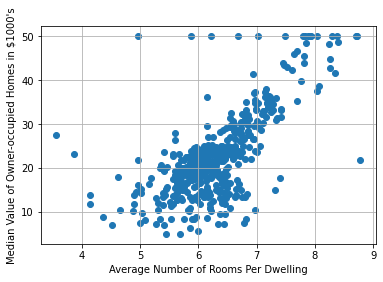

In [11]:
# TODO
plt.scatter(x,y)
plt.grid()
plt.xlabel('Average Number of Rooms Per Dwelling')
plt.ylabel("Median Value of Owner-occupied Homes in $1000's")

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit. Use the formulae given in the class, to compute the parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x + \epsilon$$ as well as the coefficient of determination $R^2$.

In [12]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = beta0 + beta1*x, 
    The function returns beta0, beta1 and rsq, where rsq is the coefficient of determination.
    """
    # TODO complete the following code
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    sxx = np.mean((x-x_bar)**2)
    syy = np.mean((y-y_bar)**2)
    sxy = np.mean((y-y_bar)*(x-x_bar))
    rhoxy = sxy/(np.sqrt(sxx)*np.sqrt(syy))
    beta1 = sxy/sxx# beta1 = ...
    beta0 = y_bar - beta1*x_bar# beta0 = ...
    rsq = rhoxy**2# rsq = ...
    return beta0, beta1, rsq

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `rsq` for the linear model of price vs. number of rooms.

In [13]:
# TODO
beta0,beta1,rsq = fit_linear(x,y)
print('beta0 = %f' %beta0)
print('beta1 = %f' %beta1)
print('rsq = %f' %rsq)

beta0 = -34.670621
beta1 = 9.102109
rsq = 0.483525


Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `xp` from say 4 to 9, computing the linear predicted values `yp` on those points and plotting `yp` vs. `xp` on top of the above plot.

In [14]:
# TODO
xp = np.arange(4,9,0.05)
yp = beta0 + beta1*xp

Text(0, 0.5, "Median Value of Owner-occupied Homes in $1000's")

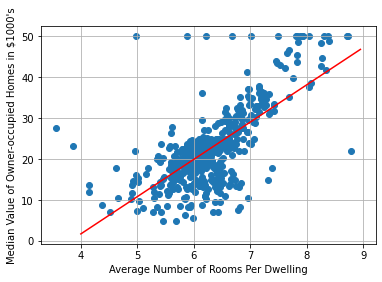

In [15]:
# TODO
plt.plot(xp,yp,'r')
plt.scatter(x,y)
plt.grid()
plt.xlabel('Average Number of Rooms Per Dwelling')
plt.ylabel("Median Value of Owner-occupied Homes in $1000's")

# Compute coefficients of determination

We next compute the $R^2$ values for all the predictors and output the values in a table. Your table should look like the following, where each the first column is the attribute name and the second column is the $R^2$ value.

    CRIM        0.151
    ZN          0.130
    INDUS       0.234
    ...         ...

To index over the set of colunms in the dataframe `df`, you can either loop over the items in the `names` lists (skipping over the final name `MEDV`) or loop over integer indices and use the method, `df.iloc`.

I will first show the method looping directly over the names in `names`.  Note that the for loop in python can directly loop over any set of elements in a container.  

In [16]:
# TODO
for i in boston.feature_names:
    x = np.array(df[i])
    x_bar = np.mean(x)
    y_bar = np.mean(y)    
    sxx = np.mean((x-x_bar)**2)
    syy = np.mean((y-y_bar)**2)
    sxy = np.mean((y-y_bar)*(x-x_bar))
    rhoxy = sxy/(np.sqrt(sxx)*np.sqrt(syy))
    R2 = rhoxy**2
    print(i+'   '+'%.3f'%R2)

CRIM   0.151
ZN   0.130
INDUS   0.234
CHAS   0.031
NOX   0.183
RM   0.484
AGE   0.142
DIS   0.062
RAD   0.146
TAX   0.220
PTRATIO   0.258
B   0.111
LSTAT   0.544
